## Creating Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

x_data = np.linspace(0.0,10.0,1000)

In [28]:
noise = np.random.normal(loc=0.0, scale=.5, size=1000)

(array([ 11.,  25.,  69., 178., 207., 215., 171.,  87.,  27.,  10.]),
 array([-1.50271704, -1.20437948, -0.90604191, -0.60770434, -0.30936677,
        -0.0110292 ,  0.28730837,  0.58564594,  0.8839835 ,  1.18232107,
         1.48065864]),
 <a list of 10 Patch objects>)

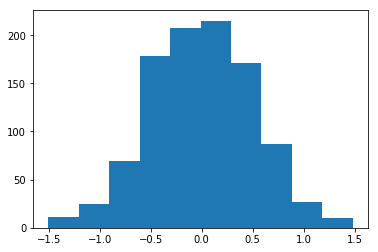

In [37]:
plt.hist(noise)

In [30]:
#noise = np.random.randn(len(x_data))

In [38]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [39]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [40]:
my_data.head()

,X Data,Y
0,0.00000,4.670019
1,0.01001,5.399876
2,0.02002,4.817419
3,0.03003,4.344516
4,0.04004,5.325451


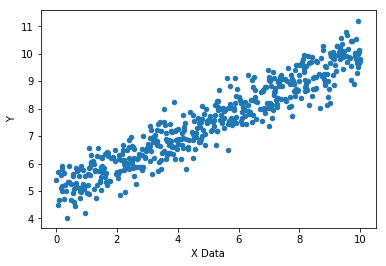

In [41]:
my_data.sample(n=500).plot(kind='scatter',x='X Data',y='Y')

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,y_true,test_size=.10)

In [57]:
y_test.shape

(100,)

In [58]:
import tensorflow as tf

In [59]:

batch_size = 8

** Variables **

In [60]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

** Placeholders **

In [61]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

** Graph **

In [62]:
y_model = m*xph + b

** Loss Function **

In [63]:
error = tf.reduce_sum(tf.square(yph-y_model))

** Optimizer **

In [64]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

** Initialize Variables **

In [65]:
init = tf.global_variables_initializer()

### Session

In [66]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(X_train),size=batch_size)
        
        feed = {xph:X_train[rand_ind],yph:y_train[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

### Results

In [71]:
y_hat = X_test * model_m + model_b

In [82]:
test_data = pd.concat([pd.DataFrame(data=X_test,columns=['X Data']),pd.DataFrame(data=y_test,columns=['Y'])],axis=1)

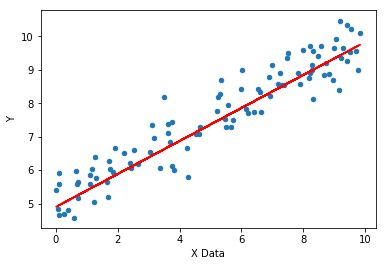

In [83]:
test_data.plot(kind='scatter',x='X Data',y='Y')
plt.plot(X_test,y_hat,'r')